# (SVR) Support Vector Regression
- SVR is the regression model has an extra tube called **Ɛ-Insensitive Tube** on the length of Ɛ take perpendicular to the regression line. Data within the tube are not considered but all the points outside the tube are **Support Vectors**
- Algorithm Type: **Regression**
- Number of the independent variable (X) = **linear : 1 | non-linear : n**
- Number of dependent variable (Y) = **1**
- Book for reference : [link](https://core.ac.uk/download/pdf/81523322.pdf)
- Below image will differentiate between simple linear regression and SVR. Where the left graph is generated on simple regression and the right graph is generated on the SVR equation on the same dataset. 


<img src="../static/svr_intuition.png" alt="svr_intuition.png" width="800" height="500" > 

## Non - Linear SVR
- Above example is only for linear SVR with one feature and one dependent variable.
- If we have multiple feature's algorithm will be changed to non-linear SVR, then there will be 3rd dimensions will be stake place.

<img src="https://miro.medium.com/max/1400/0*KDfShUSJPVgeYOXT.png" alt="non-linear-svr">

## Data preprocessing
- Import the necessary libraries.
- Load dataset (Position_Salaries.csv).
- Our dataset doesn't have any missing so, we can skip that step.
- We have categorical string data, but they are already labeled in another column called Level so, we can skip that step as well.
- We only have 10 data when we split this dataset into training and test, our algorithm doesn't give proper prediction! So, we can skip this step as well.
- SVR regression algorithms are an equation type but, it does not have any constant to make the model standardize, so we need feature scaling for this algorithm for better performance.

In [1]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# load data set
dataset = pd.read_csv(r"../dataset/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values # [row, column]
Y = dataset.iloc[:, -1].values
print("Dataset", dataset, "X", X, "Y", Y, sep="\n")

Dataset
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
X
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
Y
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature scaling independent variables

In [3]:
# Feature scaling independent variables
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
X = x_sc.fit_transform(X)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


## Feature scaling dependent variables

In [4]:
# oops error ! 
try:
    y_sc = StandardScaler()
    Y = y_sc.fit_transform(Y)
    print(Y)
except ValueError as e:
    print(e)


Expected 2D array, got 1D array instead:
array=[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


```StandardScaler.fit_transform()``` expect 2D array! So, we need convert Y to 2D array

In [5]:
# reshape 1d Y to 2d Y
Y = Y.reshape(len(Y), 1) # some.reshape(row, column)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
# Feature scaling dependent variables
y_sc = StandardScaler()
Y = y_sc.fit_transform(Y)
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [7]:
# Convert 2D y to 1D y....
Y = Y.ravel() 
print(Y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


## Train Linear SVR Regression Model
- In SVR we need kernal functions to implement it. Yes, there are lot many type of [kernal functions](https://data-flair.training/blogs/svm-kernel-functions/) are there. One we are going to use now is RBF kernal functions. 

In [8]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X, Y)

SVR()

## Test Linear SVR Regression Model

In [9]:
y_pred = svr_regressor.predict(X)
y_pred = y_sc.inverse_transform(y_pred) # to revert the feature scaling on Y....
print(y_pred)

[ 73474.15615697  70786.94584626  88213.00902103 108254.98574956
 122574.52250599 145503.10688572 209410.23132923 330606.89204569
 471671.95587315 557821.75899897]


## Check and visualize result

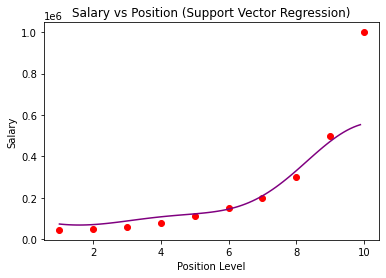

In [10]:
X_grid = np.arange(min(x_sc.inverse_transform(X)), max(x_sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter( x_sc.inverse_transform(X), y_sc.inverse_transform(Y), color = 'red')
plt.plot(X_grid, y_sc.inverse_transform(svr_regressor.predict(x_sc.transform(X_grid))), color = 'purple')
plt.title("Salary vs Position (Support Vector Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Test with new data

In [11]:
y_pred = svr_regressor.predict(x_sc.transform([[6.5]]))
y_pred = y_sc.inverse_transform(y_pred)
print(y_pred)

[170370.0204065]
